# **Customer Churn Prediction** 🧑
*Created by: Subkhan Rian Romadhon*

## Introduction

<img src="https://www.perceptive-analytics.com/wp-content/uploads/2020/05/churn-prediction-1920-614.png">

Sebuah perusahaan tidak terlepas dari masalah pelanggan yang berpotensi berpindah layanan. Berpindahnya pelanggan atau churn dapat diilustrasikan dengan gambar di atas, di mana seekor ikan yang berpindah dari akuarium kotak ke akuarium lainnya.  Masalah tersebut tentunya mengakibatkan berkurangnya pendapatan di perusahaan. Oleh karena itu, perusahaan sebisa mungkin dapat mendeteksi pelanggan mana yang berpotensi berpindah layanan sedini mungkin serta memberikan treatment khusus kepada mereka sehingga tidak jadi beralih menggunakan layanan lainnya.


</br>

*NB: Supaya lebih mudah berpindah dari bagian satu ke bagian lainnya bisa menggunakan fitur **Table of contents** dari google colab*

In [ ]:
#mengimpor library
#semua library yang dibutuhkan akan saya taruh pada sel ini
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import recall_score, roc_auc_score, f1_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks

## Step 1: Mengimpor Dataset 💾

Data yang digunakan terdiri dari data **train.csv** dan **test.csv**. Data train memiliki label yang menunjukkan apakah seseorang berpotensi pindah provider (churn) atau tidak. Data ini digunakan dalam pembuatan model machine learning. Sementara itu, data test merupakan data baru yang tidak memiliki label. Kita akan menggunakan model machine learning yang telah dibuat untuk memprediksi data test. Secara umum kedua data terdiri dari beberapa kolom dengan deskripsi sebagai berikut:

| **No** | **Kolom**                     | **Definisi**                                              |
|--------|-------------------------------|-----------------------------------------------------------|
| 1.     | state                         | State di US                                               |
| 2.     | account_length                | Total bulan customer menjadi telco provider               |
| 3.     | area_code                     | Kode area                                                 |
| 4.     | international_plan            | Customer memiliki plan internasional                      |
| 5.     | voice_mail_plan               | Customer memiliki plan voice mail                         |
| 6.     | number_vmail_messages         | Total pesan voice mail                                    |
| 7.     | total_day_minutes             | Total menit pada day call                                 |
| 8.     | total_day_calls               | Total day call                                            |
| 9.     | total_day_charge              | Total biaya dari day call                                 |
| 10.    | total_eve_minutes             | Total menit pada evening call                             |
| 11.    | total_eve_calls               | Total evening call                                        |
| 12.    | total_eve_charge              | Total biaya dari evening call                             |
| 13.    | total_night_minutes           | Total menit pada night call                               |
| 14.    | total_night_calls             | Total night call                                          |
| 15.    | total_night_charge            | Total biaya dari night call                               |
| 16.    | total_intl_minutes            | Total menit pada international call                       |
| 17.    | total_intl_calls              | Total international call                                  |
| 18.    | total_intl_charge             | Total biaya dari international call                       |
| 19.    | number_customer_service_calls | Total call pada customer service                          |
| 20.    | churn (data train)            | Menunjukkan apakah customer beralih (yes) atau tidak (no) |

In [ ]:
#load dataset
df_train = pd.read_csv("https://github.com/rianromad/rianromad/files/10398985/train.csv")
df_test = pd.read_csv("https://github.com/rianromad/rianromad/files/10398990/test.csv")

In [ ]:
#mengecek data train
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
#mengecek data test
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


Pada data test terdapat kolom id pelanggan yang digunakan sebagai penanda untuk memprediksi apakah mereka masuk ke dalam kategori churn atau tidak. Data test tidak memiliki kolom label yang menunjukkan apakah pelanggan tersebut churn atau tidak.

In [ ]:
#cek informasi data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
#cek informasi data test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

Dengan method info(), kita dapat mengetahui bahwa semua kolom dari kedua dataset tidak memiliki nilai kosong atau null value. Data train memiliki 4250 baris sedangkan data test memiliki 750 baris data.

In [ ]:
#statistika deskriptif untuk data train
df_train.describe().loc[['mean','50%'],:].T

,mean,50%
account_length,100.236235,100.00
number_vmail_messages,7.631765,0.00
total_day_minutes,180.259600,180.45
total_day_calls,99.907294,100.00
total_day_charge,30.644682,30.68
total_eve_minutes,200.173906,200.70
total_eve_calls,100.176471,100.00
total_eve_charge,17.015012,17.06
total_night_minutes,200.527882,200.45
total_night_calls,99.839529,100.00


Dari statistika deskriptif, kita dapat mengetahui kolom mana yang memiliki kemungkinan terdistribusi normal, di mana nilai mean memiliki kemiripan dengan median. Kolom tersebut adalah semua yang berkaitan dengan day call, eve call, night call, dan international call mulai dari total waktu (menit), jumlah panggilan maupun biaya yang dikeluarkan.

## Step 2: Exploratory Data Analysis 📊

Tahapan Exploratory Data Analysis (EDA) digunakan untuk memahami karakteristik dari dataset yang disajikan dalam bentuk visualisasi maupun statistika deskriptif.

#### EDA 1. Persebaran Label

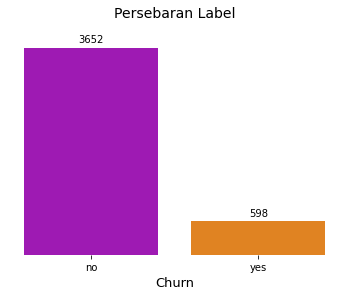

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data=df_train, x="churn", palette=["#b100cd","#ff8303"], ax=ax)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+90, height, ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("Persebaran Label", fontsize=14, pad=20)
ax.set_xlabel("Churn",fontsize=13)
ax.get_yaxis().set_visible(False)
plt.show()

Dari visualisasi di atas terlihat bahwa komposisi label tidak seimbang (7:1). Hal ini mengindikasikan bahwa pada perusahaan tersebut jarang ditemukan kasus pelanggan yang beralih provider (churn).

#### EDA 2. Pesebaran State dan Area Code

In [ ]:
#fungsi barplot untuk state dan area code
def bar(data, col, color, title, xlabel, figsize):
  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(data=data, x=col, color=color, ax=ax, order=data[col].value_counts().sort_index().index)
  for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+1, height, ha="center")
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.set_title(title, fontsize=15, pad=20)
  ax.set_xlabel(xlabel,fontsize=13)
  ax.get_yaxis().set_visible(False)
  plt.show()

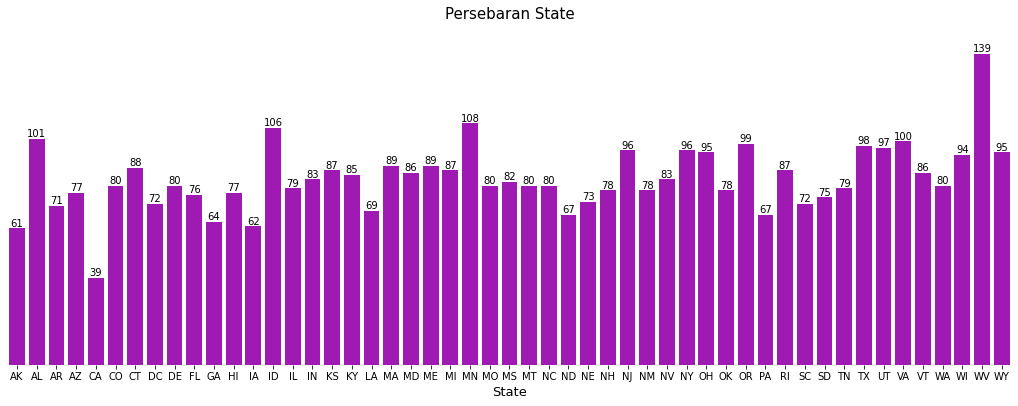

In [ ]:
bar(data=df_train, col="state", color="#b100cd", title="Persebaran State", xlabel="State", figsize=(18,6))

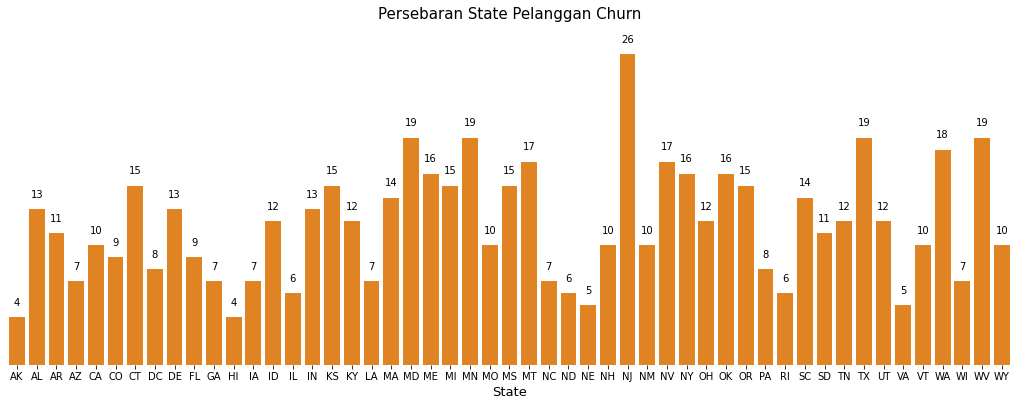

In [ ]:
churn = df_train[df_train["churn"]=="yes"]
bar(data=churn, col="state", color="#ff8303", title="Persebaran State Pelanggan Churn", xlabel="State", figsize=(18,6))

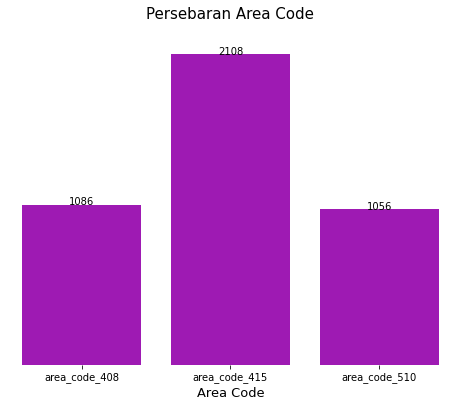

In [ ]:
bar(data=df_train, col="area_code", color="#b100cd", title="Persebaran Area Code", xlabel="Area Code", figsize=(8,6))

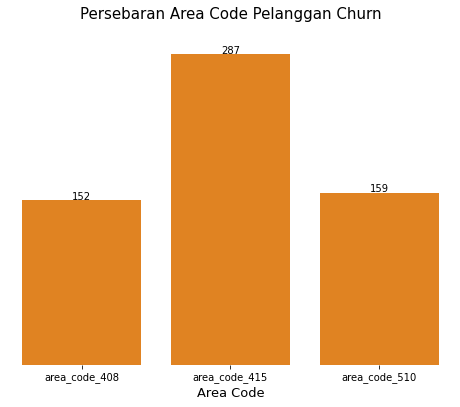

In [ ]:
churn = df_train[df_train["churn"]=="yes"]
bar(data=churn, col="area_code", color="#ff8303", title="Persebaran Area Code Pelanggan Churn", xlabel="Area Code", figsize=(8,6))

Terdapat 51 state yang tersebar pada dataset train. WV adalah state paling banyak ditemukan dengan jumlah 139 data. Di sisi lain, state CA adalah yang paling sedikit dengan jumlah kemunculan sebanyak 39 data. Pelanggan churn banyak ditemukan pada state NJ sejumlah 26 pelanggan dan kode area 415 sejumlah 287 pelanggan.

#### EDA 3. Account Length terhadap Churn



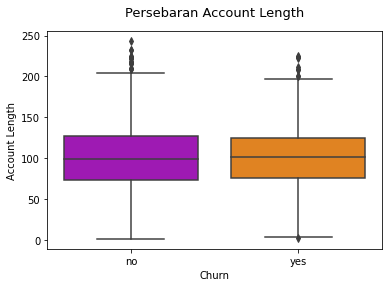

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data=df_train, x="churn", y="account_length", ax=ax, palette=["#b100cd","#ff8303"])
ax.set_title("Persebaran Account Length", fontsize=13, pad=15)
ax.set_xlabel("Churn", fontsize=10)
ax.set_ylabel("Account Length", fontsize=10)
plt.show()

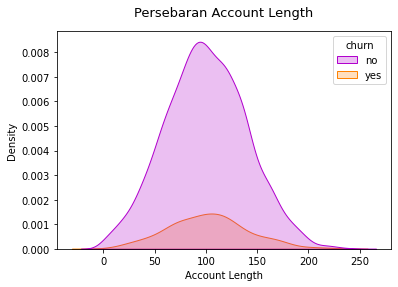

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(data=df_train, hue="churn", x="account_length", fill=True, ax=ax, palette=["#b100cd","#ff8303"])
ax.set_title("Persebaran Account Length", fontsize=13, pad=15)
ax.set_xlabel("Account Length", fontsize=10)
plt.show()

Account length menunjukkan seberapa lama pelanggan menggunakan layanan provider dari perusahaan. Visualisasi boxplot di atas menunjukkan bahwa sebaran account length dari pelanggan churn maupun no churn tidak memiliki perbedaan yang signifikan. Selain itu, juga ditemukan outlier pada persebaran account length untuk kedua label.

#### EDA 4. International dan Voice Mail Plan terhadap Churn


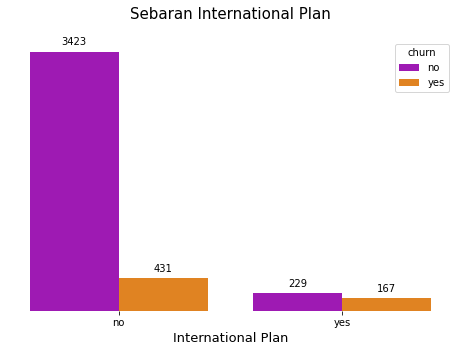

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df_train, x="international_plan", hue="churn", ax=ax, palette=["#b100cd","#ff8303"])
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+90, height, ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("Sebaran International Plan", fontsize=15, pad=20)
ax.set_xlabel("International Plan",fontsize=13)
ax.get_yaxis().set_visible(False)
plt.show()

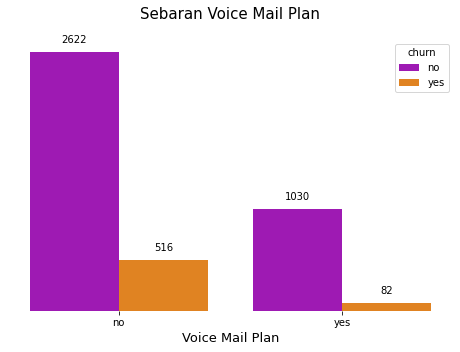

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df_train, x="voice_mail_plan", hue="churn", order=["no", "yes"], ax=ax, palette=["#b100cd","#ff8303"])
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+90, height, ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("Sebaran Voice Mail Plan", fontsize=15, pad=20)
ax.set_xlabel("Voice Mail Plan",fontsize=13)
ax.get_yaxis().set_visible(False)
plt.show()

Dari kedua visualisasi, kita dapat mengetahui bahwa pelanggan yang churn cenderung tidak menggunakan voice mail maupun international plan.

#### EDA 5. Jumlah Voice Mail Messages terhadap Churn
Untuk visualisasi di bawah ini, saya akan melakukan filter terlebih dahulu untuk memilih pelanggan yang menggunakan voice mail plan.

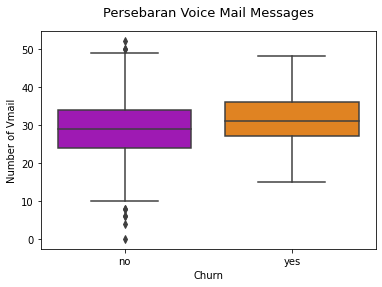

In [ ]:
fig, ax = plt.subplots()
voicemail = df_train[df_train['voice_mail_plan']=="yes"]
sns.boxplot(data=voicemail, x="churn", y="number_vmail_messages", ax=ax, palette=["#b100cd","#ff8303"])
ax.set_title("Persebaran Voice Mail Messages", fontsize=13, pad=15)
ax.set_xlabel("Churn", fontsize=10)
ax.set_ylabel("Number of Vmail", fontsize=10)
plt.show()

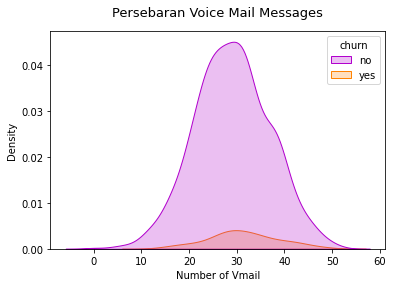

In [ ]:
fig, ax = plt.subplots()
voicemail = df_train[df_train['voice_mail_plan']=="yes"]
sns.kdeplot(data=voicemail,hue="churn", fill=True, x="number_vmail_messages", ax=ax, palette=["#b100cd","#ff8303"])
ax.set_title("Persebaran Voice Mail Messages", fontsize=13, pad=15)
ax.set_xlabel("Number of Vmail", fontsize=10)
plt.show()

Dari visualisasi boxplot, kita dapat mengetahui bahwa pelanggan churn yang menggunakan voice mail cenderung mengirimkan voice mail lebih banyak daripada pelanggan no churn yang menggunakan voice mail.

#### EDA 6. Day Call terhadap Churn

In [ ]:
#fungsi untuk membuat boxplot dan kdeplot

def cols_plot(list_cols, mode_="box"):
  fig, ax = plt.subplots(ncols=len(list_cols), figsize=(20,5))
  if mode_=="box":
    for i,v in enumerate(list_cols):
      sns.boxplot(data=df_train, x="churn", y=v, ax=ax[i], palette=["#b100cd","#ff8303"])
      ax[i].set_title("Persebaran"+" "+re.sub("_", " ", v).title(), fontsize=13, pad=15)
      ax[i].set_ylabel(re.sub("_", " ", v).title(), fontsize=10)
      ax[i].set_xlabel("Churn")

  elif mode_=="kde":
    for i,v in enumerate(list_cols):
      sns.kdeplot(data=df_train, fill=True, hue="churn", x=v, ax=ax[i], palette=["#b100cd","#ff8303"])
      ax[i].set_title("Persebaran"+" "+re.sub("_", " ", v).title(), fontsize=13, pad=15)
      ax[i].set_xlabel(re.sub("_", " ", v).title(), fontsize=10)

  else:
    print("Wrong Argument !")

  plt.show()

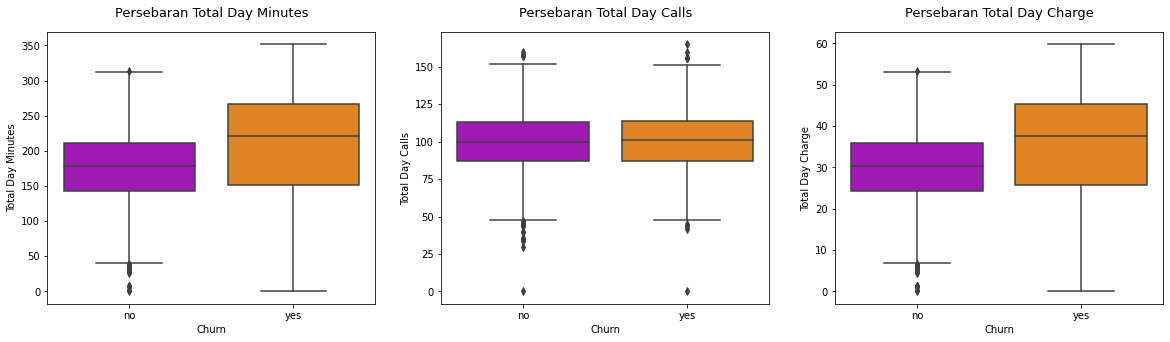

In [ ]:
day_cols = ['total_day_minutes','total_day_calls', 'total_day_charge']
cols_plot(day_cols, mode_="box")

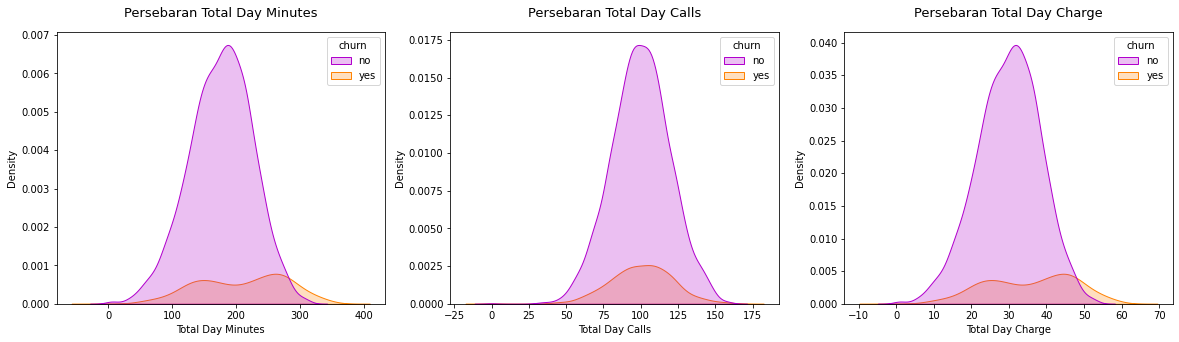

In [ ]:
day_cols = ['total_day_minutes','total_day_calls', 'total_day_charge']
cols_plot(day_cols, mode_="kde")

Dari visualisasi di atas, pelanggan churn cenderung menghabiskan waktu dan biaya yang lebih lama untuk melakukan day call. Selain itu, sebaran total day minutes memiliki bentuk yang sangat mirip dengan total day charge. Saya memiliki hipotesis bahwa variabel total day charge diperoleh dengan mengalikan total day minutes dengan biaya day call per menit. Saya akan mencoba mencari besaran biaya day call per menit tersebut kemudian memvisualisasikan persebarannya. Jika ternyata biaya day call per menit memiliki kemiripan satu sama lain, maka variabel total day charge merupakan turunan dari total day minutes sehingga kita cukup memakai salah satu dari dua variabel tersebut.

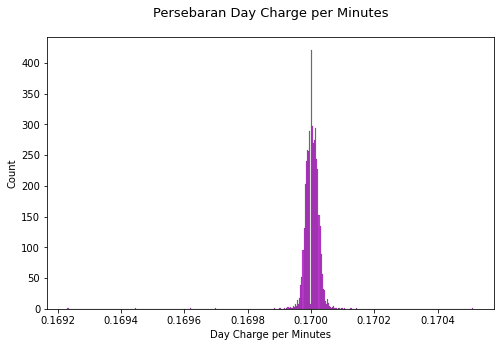

In [ ]:
daycharge_per_minutes = df_train['total_day_charge']/df_train['total_day_minutes']
fig, ax = plt.subplots( figsize=(8,5))
sns.histplot(daycharge_per_minutes, color="#b100cd", ax=ax)
ax.set_title("Persebaran Day Charge per Minutes", fontsize=13, pad=20)
ax.set_xlabel("Day Charge per Minutes")
plt.show()

Hmmm, hipotesis saya terbukti. Biaya per menit untuk day call cenderung memiliki selisih yang sangat kecil antara satu dengan yang lain. Oleh karena itu, saya cukup menggunakan variabel total_day_charge saja.

#### EDA 7. Eve Call terhadap Churn


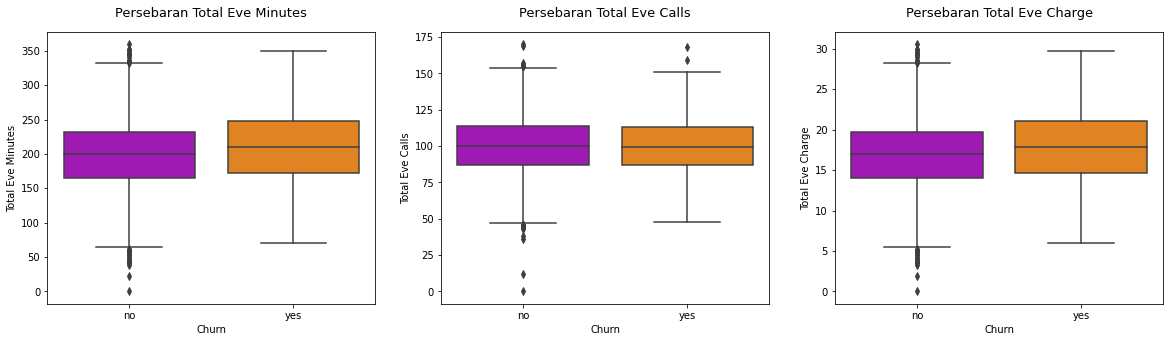

In [ ]:
eve_cols = ['total_eve_minutes', 'total_eve_calls', 'total_eve_charge']
cols_plot(eve_cols, mode_="box")

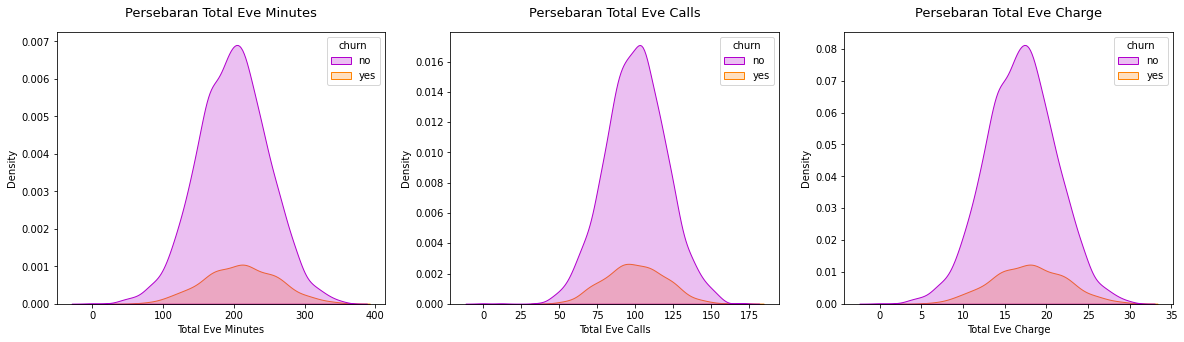

In [ ]:
eve_cols = ['total_eve_minutes', 'total_eve_calls', 'total_eve_charge']
cols_plot(eve_cols, mode_="kde")

Dari visualisasi di atas, pelanggan churn cenderung menghabiskan waktu dan biaya yang lebih lama untuk melakukan eve call. Sama halnya dengan day call, ditemukan bentuk persebaran yang sangat mirip antara variabel total eve minutes dan total eve charge. Saya akan memvisualisasikan biaya per menit untuk eve call supaya bisa mengetahui apakah biaya eve call per menit memiliki kemiripan satu sama lain.

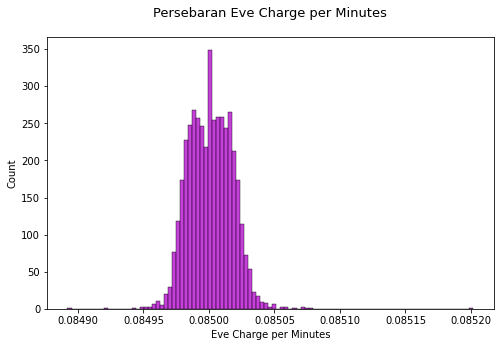

In [ ]:
evecharge_per_minutes = df_train['total_eve_charge']/df_train['total_eve_minutes']
fig, ax = plt.subplots( figsize=(8,5))
sns.histplot(evecharge_per_minutes, color="#b100cd", ax=ax)
ax.set_title("Persebaran Eve Charge per Minutes", fontsize=13, pad=20)
ax.set_xlabel("Eve Charge per Minutes")
plt.show()

Biaya per menit untuk eve call cenderung memiliki selisih yang sangat kecil antara satu dengan yang lain. Oleh karena itu, saya cukup menggunakan variabel total eve charge dan tidak menggunakan variabel total eve minutes.

#### EDA 8. Night Call terhadap Churn

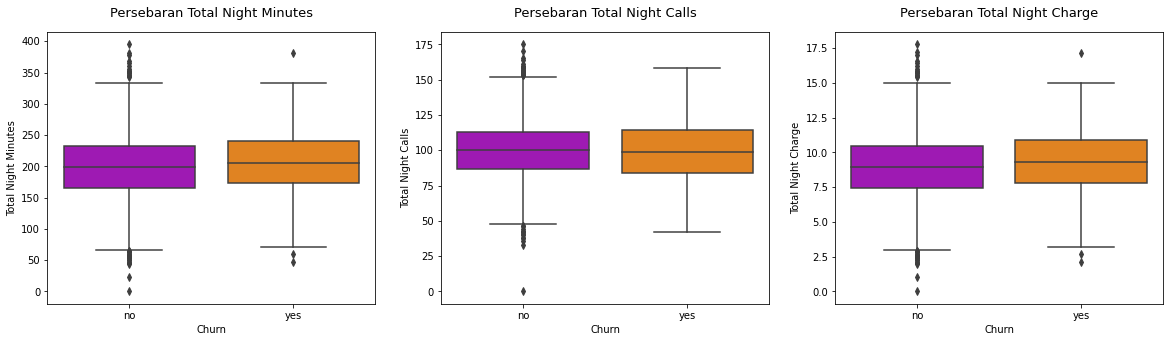

In [ ]:
night_cols = ['total_night_minutes', 'total_night_calls', 'total_night_charge']
cols_plot(night_cols, mode_="box")

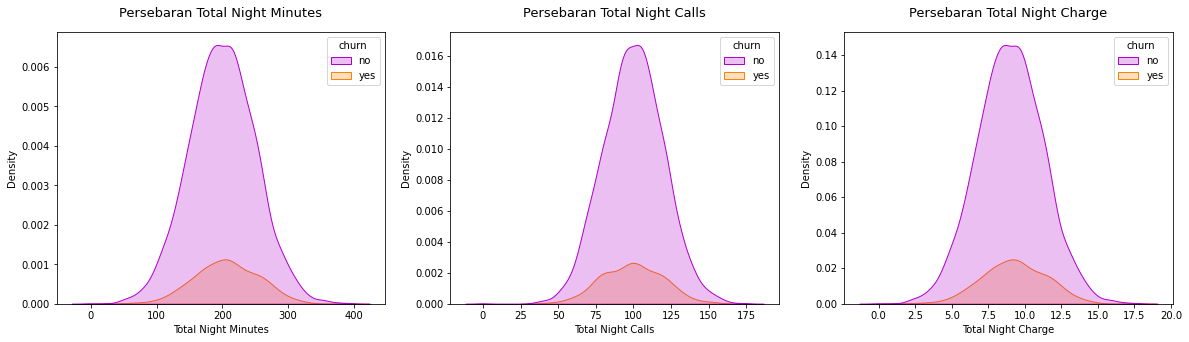

In [ ]:
night_cols = ['total_night_minutes', 'total_night_calls', 'total_night_charge']
cols_plot(night_cols, mode_="kde")

Dari visualisasi di atas, pelanggan churn cenderung menghabiskan waktu dan biaya yang lebih lama untuk melakukan night call. Selain itu, juga ditemukan bentuk persebaran yang sangat mirip antara variabel total night minutes dan total night charge. Saya akan memvisualisasikan biaya per menit untuk night call supaya bisa mengetahui apakah biaya night call per menit memiliki kemiripan satu sama lain.

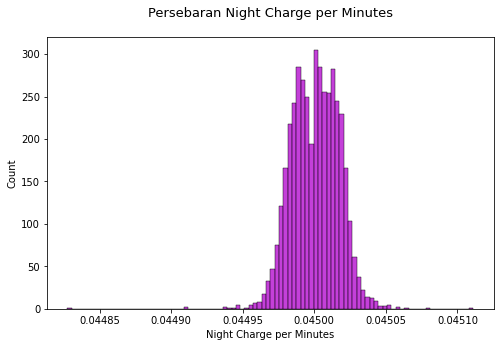

In [ ]:
nightcharge_per_minutes = df_train['total_night_charge']/df_train['total_night_minutes']
fig, ax = plt.subplots( figsize=(8,5))
sns.histplot(nightcharge_per_minutes, color="#b100cd", ax=ax)
ax.set_title("Persebaran Night Charge per Minutes", fontsize=13, pad=20)
ax.set_xlabel("Night Charge per Minutes")
plt.show()

Biaya per menit untuk night call cenderung memiliki selisih yang sangat kecil antara satu dengan yang lain. Oleh karena itu, saya cukup menggunakan variabel total night charge dan tidak menggunakan variabel total night minutes.

#### EDA 9. International Call terhadap Churn

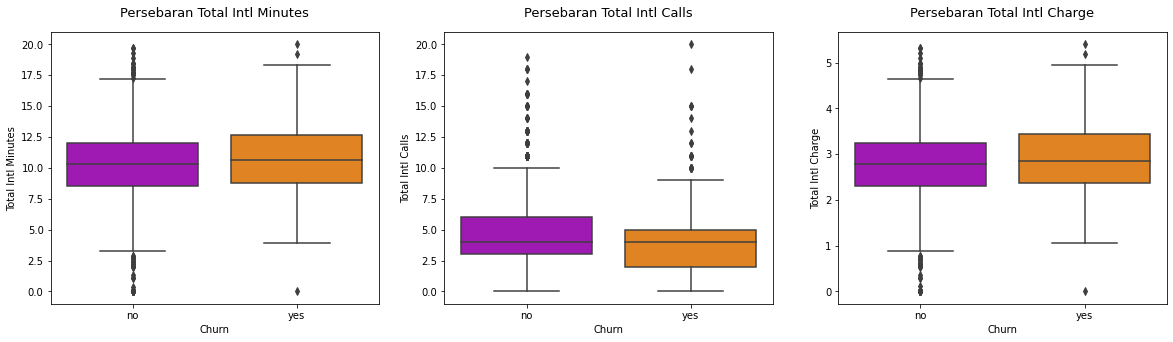

In [ ]:
intl_cols = ['total_intl_minutes', 'total_intl_calls', 'total_intl_charge']
cols_plot(intl_cols, mode_="box")

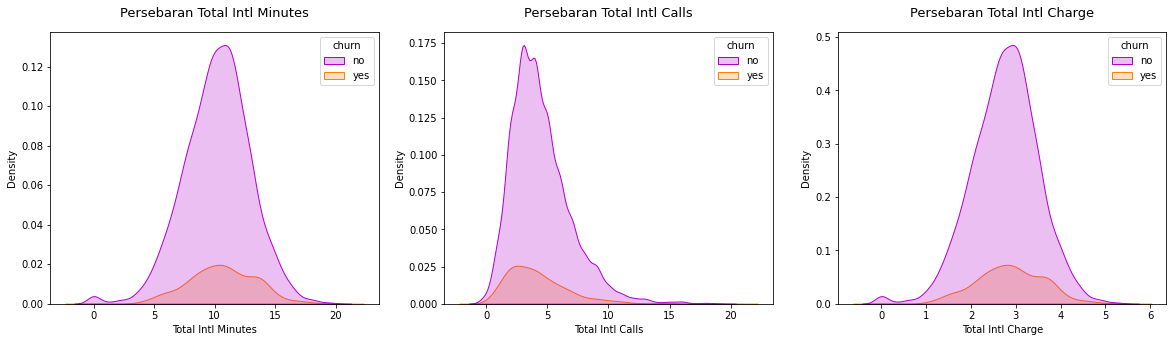

In [ ]:
intl_cols = ['total_intl_minutes', 'total_intl_calls', 'total_intl_charge']
cols_plot(intl_cols, mode_="kde")

Dari visualisasi di atas, pelanggan churn cenderung menghabiskan waktu dan biaya yang lebih lama untuk melakukan international call. Pelanggan churn juga melakukan panggilan international yang lebih sedikit dibandingkan pelanggan yang tidak churn. Selain itu, juga ditemukan bentuk persebaran yang sangat mirip antara variabel total intl minutes dan total intl charge. Saya akan memvisualisasikan biaya per menit untuk intl call supaya bisa mengetahui apakah biaya intl call per menit memiliki kemiripan satu sama lain.

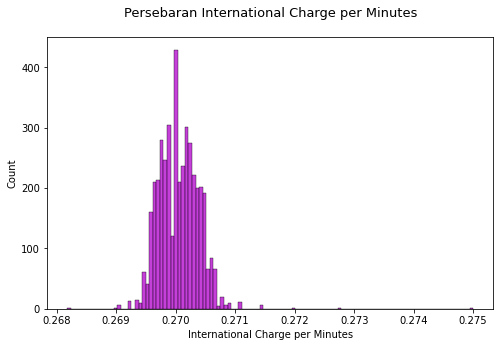

In [ ]:
intlcharge_per_minutes = df_train['total_intl_charge']/df_train['total_intl_minutes']
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(intlcharge_per_minutes, color="#b100cd", ax=ax)
ax.set_title("Persebaran International Charge per Minutes", fontsize=13, pad=20)
ax.set_xlabel("International Charge per Minutes")
plt.show()

Biaya per menit untuk international call cenderung memiliki selisih yang sangat kecil antara satu dengan yang lain. Oleh karena itu, saya cukup menggunakan variabel total intl charge dan tidak menggunakan variabel total intl minutes.

Dari keempat jenis call, biaya per menit untuk international call paling mahal sedangkan night call adalah yang paling murah.

#### EDA 10. Jumlah Customer Service Calls terhadap Churn

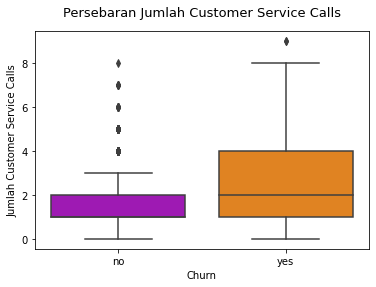

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data=df_train, x="churn", y="number_customer_service_calls", ax=ax, palette=["#b100cd","#ff8303"])
ax.set_title("Persebaran Jumlah Customer Service Calls", fontsize=13, pad=15)
ax.set_xlabel("Churn", fontsize=10)
ax.set_ylabel("Jumlah Customer Service Calls", fontsize=10)
plt.show()

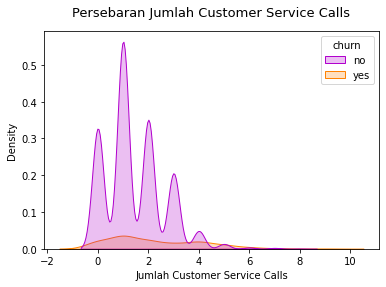

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(data=df_train, hue="churn", x="number_customer_service_calls", fill=True, ax=ax, palette=["#b100cd","#ff8303"])
ax.set_title("Persebaran Jumlah Customer Service Calls", fontsize=13, pad=15)
ax.set_xlabel("Jumlah Customer Service Calls", fontsize=10)
plt.show()

Customer churn cenderung melakukan service call lebih banyak dibandingkan pelanggan yang tidak churn.

### EDA Conclusion:

Setelah melakukan tahapan EDA, diperoleh beberapa poin kesimpulan sebagai berikut:
1. Tidak terdapat missing value pada data train maupun test.
2. Dataset tidak seimbang, di mana perbandingan label churn dengan no churn adalah sekitar 1:7. Diperlukan tahapan upsampling atau downsampling untuk mengatasi ketidakseimbangan data.
3. Pelanggan churn paling banyak ditemukan pada state NJ (26) dan kode area 415 (287).
4. Banyak pelanggan churn yang tidak menggunakan international plan maupun voice mail plan.
5. Pelanggan churn yang menggunakan voice mail cenderung mengirimkan voice mail lebih banyak daripada pelanggan no churn yang juga menggunakan voice mail.
6. Sebaran total charge pelanggan churn lebih tinggi pada semua situasi (day, eve, night, intl) dibandingkan pelanggan yang tidak churn.
7. Sebaran total calls relatif sama pada semua kondisi, kecuali pada international call di mana totaol calls pelanggan churn jauh lebih rendah jika dibandingkan pelanggan yang tidak churn.
8. Sebaran total menit memiliki kemiripan dengan sebaran biaya untuk masing-masing kondisi yakni day, eve, night, dan international. Alangkah lebih baik jika cukup menggunakan salah satu variabel dari total menit atau total biaya.
9. Terdapat variabel bertipe kategorikal yang perlu diubah menjadi numerik seperti international plan, voice message plan, churn, kode area dan state.
10. Masih terdapat outlier pada semua variabel bertipe numerikal.
11. Sebaran total menit memiliki kemiripan dengan sebaran biaya untuk masing-masing kondisi yakni day, eve, night, dan international. Alangkah lebih baik jika cukup menggunakan salah satu variabel dari total menit atau total biaya.
12. Customer yang beralih atau churn cenderung melakukan service call lebih banyak dibandingkan pelanggan yang tidak churn.



## Step 3: Data Preprocessing 💻

Berikut adalah tahapan selanjutnya akan dilakukan berdasarkan hasil analisis saya pada tahapan EDA:

1. Membuat variabel baru bernama total_all_call dan total_all_charge (Feature Encoding)
2. Melakukan drop kolom total minutes untuk day, eve, night, dan international call.
3. Melakukan encoding untuk data kategorikal, khususnya variabel international plan, voice message plan, churn, kode area dan state.
4. Melakukan scaling data numerikal, khususnya variabel di bawah ini  dikarenakan terdapat outlier:
  - account_length
  - number_vmail_messages
  - total_day_calls
  - total_day_charge
  - total_eve_calls
  - total_eve_charge
  - total_night_calls
  - total_night_charge
  - total_intl_calls
  - total_intl_charge
  - number_customer_service_calls

  Saya akan menggunakan metode Robust Scaler dikarenakan metode ini cocok digunakan untuk melakukan perubahan skala pada data yang memiliki outlier.


#### 1. Feature Encoding

Saya akan membuat dua buah variabel berupa total_all_call, dan total_all_charge. Total all call merupakan akumulasi call dari semua kondisi, yakni day, eve, night dan international. Di sisi lain, total all charge merupakan akumulasi biaya dari keempat kondisi tersebut. Saya juga akan memvisualisasikan sebaran kedua variabel tersebut.

In [ ]:
df_train['total_all_calls'] = df_train['total_day_calls'] + df_train['total_eve_calls'] + df_train['total_night_calls'] + df_train['total_intl_calls']
df_train['total_all_charge'] = df_train['total_day_charge'] + df_train['total_eve_charge'] + df_train['total_night_charge'] + df_train['total_intl_charge']

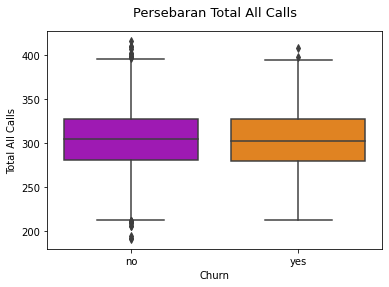

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data=df_train, x="churn", y="total_all_calls", ax=ax, palette=["#b100cd","#ff8303"])
ax.set_title("Persebaran Total All Calls", fontsize=13, pad=15)
ax.set_xlabel("Churn", fontsize=10)
ax.set_ylabel("Total All Calls", fontsize=10)
plt.show()

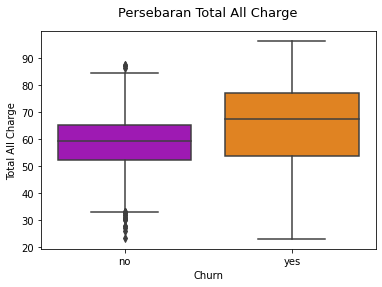

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data=df_train, x="churn", y="total_all_charge", ax=ax, palette=["#b100cd","#ff8303"])
ax.set_title("Persebaran Total All Charge", fontsize=13, pad=15)
ax.set_xlabel("Churn", fontsize=10)
ax.set_ylabel("Total All Charge", fontsize=10)
plt.show()

Dari visualisasi di atas, sebaran total all charge pada pelanggan churn jauh kebih tinggi dibandingkan pelanggan yang tidak churn.

#### 2. Drop Kolom
Saya akan melakukan drop kolom total menit untuk keempat kondisi dikarenakan bentuk sebaran sangat mirip dengan sebaran total biayanya. Hal tersebut telah dibuktikan pada tahapan sebelumnya.

In [ ]:
#kita pisahkan terlebih dahulu variabel independen (X) dengan variabel dependen (y/label churn)
X = df_train.copy().drop('churn', axis=1)
y = df_train.copy()['churn']

In [ ]:
def drop_cols(data):
  df_drop = data.copy().drop(['total_day_minutes','total_eve_minutes','total_night_minutes', 'total_intl_minutes'],axis=1)
  return df_drop

In [ ]:
X_drop = drop_cols(X)
X_drop.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,total_all_calls,total_all_charge
0,OH,107,area_code_415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,332,59.24
1,NJ,137,area_code_415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,333,62.29
2,OH,84,area_code_408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,255,66.80
3,OK,75,area_code_415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,359,52.09
4,MA,121,area_code_510,no,yes,24,88,37.09,108,29.62,118,9.57,7,2.03,3,321,78.31


#### 3. Encoding Data Kategorikal
Data kategorikal perlu diubah menjadi numerikal dikarenakan terdapat model seperti KNearest Neighbor maupun Logistic Regression yang hanya menerima nilai berupa numerik saja. Untuk variabel yang memiliki nilai berupa yes atau no, saya akan melakukan binary encoding. Di sisi lain untuk variabel kategorikal nominal, saya akan melakukan one hot encoding. Di bawah ini merupakan ilustrasi dari one hot encoding.

<br>

<img src="https://user-images.githubusercontent.com/61647791/196075038-a2985201-df90-4e2c-8673-619dff0cc563.PNG" />

*One Hot Encoding*

In [ ]:
#encoding binary untuk label atau variabel dependen
y_final = y.replace({"yes":1,"no":0}).astype("uint8")

In [ ]:
#cat encoding untuk variabel independen

def cat_encode(data):
  #replace yes no values with binary value
  bin_cols = ["international_plan", "voice_mail_plan"]
  data[bin_cols] = data[bin_cols].replace({"yes":1,"no":0}).astype("uint8")

  #encode nominal categorical data
  cat_df = data.select_dtypes('object')
  num_df = data.select_dtypes(exclude="object")
  cat_encode = pd.get_dummies(cat_df)
  final_cat_encode = cat_encode.join(num_df)
  return final_cat_encode

In [ ]:
X_encode = cat_encode(X_drop)
X_encode.head()

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,total_all_calls,total_all_charge
0,0,0,0,0,0,0,0,0,0,0,...,27.47,103,16.62,103,11.45,3,3.70,1,332,59.24
1,0,0,0,0,0,0,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,0,333,62.29
2,0,0,0,0,0,0,0,0,0,0,...,50.90,88,5.26,89,8.86,7,1.78,2,255,66.80
3,0,0,0,0,0,0,0,0,0,0,...,28.34,122,12.61,121,8.41,3,2.73,3,359,52.09
4,0,0,0,0,0,0,0,0,0,0,...,37.09,108,29.62,118,9.57,7,2.03,3,321,78.31


Dari encoding data kategorikal, jumlah variabel independen bertambah menjadi 69.

#### 4. Scaling Data Numerikal
Scaling merupakan tahapan untuk melakukan perubahan pada data numerikal sehingga memiliki nilai yang berada pada rentang tertentu. Tahapan ini dilakukan karena terdapat algoritma yang melakukan perhitungan jarak atau algoritma yang menggunakan fungsi matematis seperti KNN maupun Logistic Regression. Diharapkan tahapan scaling dapat memudahkan model dalam belajar sehingga bisa mempercepat proses komputasi.

Dari beragam teknik scaling yang ada, saya memilih teknik scaling dengan metode Robust Scaler dikarenakan cocok digunakan ketika terdapat outlier pada data numerikal tersebut. Metode ini menghilangkan median dan melakukan scaling berdasarkan jangkauan interkuartil (IQR). Berikut merupakan formula dari Robust Scaler:

$\huge {xi}'=\frac{xi-Q1(x)}{Q3(x)-Q1(x)} $

<br>
Untuk lebih jelas dapat dilihat pada <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html">link ini</a>.




In [ ]:
def scaler(data):
  num_df = data.select_dtypes(include=[float, int])
  cat_df = data.select_dtypes(exclude=[float, int])
  rs = RobustScaler()
  scl = rs.fit_transform(num_df)
  scl_df = pd.DataFrame(scl, columns=num_df.columns, index=num_df.index)
  final_scaled = cat_df.join(scl_df)
  return final_scaled


In [ ]:
X_final = scaler(X_encode)
X_final.head()

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,total_all_calls,total_all_charge
0,0,0,0,0,0,0,0,0,0,0,...,-0.259184,0.111111,-0.076323,0.111111,0.800000,-0.333333,0.978723,0.0,0.586957,-0.018388
1,0,0,0,0,0,0,0,0,0,0,...,0.863948,0.370370,-1.172593,0.148148,-0.559671,0.333333,0.542553,-1.0,0.608696,0.201550
2,0,0,0,0,0,0,0,0,0,0,...,1.632620,-0.444444,-2.046834,-0.407407,-0.052675,1.000000,-1.063830,1.0,-1.086957,0.526771
3,0,0,0,0,0,0,0,0,0,0,...,-0.188938,0.814815,-0.771899,0.777778,-0.200823,-0.333333,-0.053191,2.0,1.173913,-0.533982
4,0,0,0,0,0,0,0,0,0,0,...,0.517562,0.296296,2.178664,0.666667,0.181070,1.000000,-0.797872,2.0,0.347826,1.356769


## Step 4: Pemodelan ML 🤖

Saya akan menggunakan Stratified KFold untuk memilih algoritma mana yang paling cocok. Metode ini merupakan pengembangan dari KFold di mana rasio label pada setiap fold akan tetap sama.

<img src="https://www.analyseup.com/img/python-machine-learning/stratified-kfold/stratified-kfold-example.png"/>

 Selanjutnya saya akan menggunakan algoritma terbaik untuk membuat model yang selanjutnya digunakan untuk memprediksi data test. Berikut adalah algoritma yang akan saya gunakan:

1. K Nearest Neighbor (KNN)
2. Decision Tree
3. Logistic Regression

Terdapat beberapa metrik yang akan saya gunakan untuk memilih algoritma yang paling cocok.
1. Akurasi

  Mempertimbangkan true postif dibandingkan true negatif. Lebih baik memprediksi pengguna churn tetapi aktualnya tidak churn daripada sebaliknya.

  <img src="https://www.mydatamodels.com/wp-content/uploads/2020/10/2.-Accuracy-formula-machine-learning-algorithms.png"/>

2. Recall

  Mempertimbangkan true postif dibandingkan true negatif. Lebih baik memprediksi pengguna churn tetapi aktualnya tidak churn daripada sebaliknya.
<img src="https://blog.roboflow.com/content/images/size/w1000/2022/03/recall_formula.png" />

3. AUC Score

  Semakin tinggi skor AUC, maka model dapat membedakan kedua label dengan lebih baik.
  <img src="https://www.researchgate.net/publication/343846811/figure/fig3/AS:928238398369793@1598320688275/Receiver-operating-characteristic-ROC-curve-and-threshold-determinator-65-The-area.png" />

4. F1-Score

 Menilai seberapa banyak data yang hasil prediksinya sesuai dengan aktual.

<img src="https://miro.medium.com/max/1400/1*5_ZAlFhlCk8llhnYWD5PXw.png"/>

Tahapan upsampling dan downsampling dilakukan selama pemilihan algoritma maupun pelatihan model. Berikut adalah metode yang saya gunakan.
1. SMOTENC

 Metode upsampling SMOTE untuk data numerikal dan kategorikal.

2. Tomek Links

 Metode undersampling dengan mengurangi tomek links yang merupakan pasangan observasi dari dua label yang berbeda di mana keduanya memiliki kemiripan nilai atau tetangga terdekat.




In [ ]:
models = [  KNeighborsClassifier()
          , LogisticRegression(random_state=123, solver='liblinear')
          , DecisionTreeClassifier(random_state=123)
         ]

X_cat_mask = [True if X_final[i].dtype == 'uint8' else False for i in X_final.columns] # kolom mana saja yg kategorikal
n_folds = 10
kf = StratifiedKFold(n_splits=n_folds)
res = {}
for i, (train_index, test_index) in enumerate(kf.split(X_final, y_final)):
    # Train set
    X_train_fold = X_final.iloc[train_index]
    y_train_fold = y_final.iloc[train_index]

    # Test set
    X_test_fold = X_final.iloc[test_index]
    y_test_fold = y_final.iloc[test_index]

    # Over-sample label churn pada data train
    sm = SMOTENC(random_state=42, categorical_features=X_cat_mask) # Specify which features are categorical
    X_train_fold, y_train_fold = sm.fit_resample(X_train_fold, y_train_fold)

    # Under-sample label no churn (0) dengan mengurangi Tomek links
    # Tomek links: pasangan observasi dari dua label yang berbeda di mana keduanya memiliki kemiripan nilai atau tetangga terdekat
    tl = TomekLinks(sampling_strategy=[0])
    X_train_fold, y_train_fold = tl.fit_resample(X_train_fold, y_train_fold)

    for model in models:
        # Fit the model dengan data train
        model.fit(X_train_fold, y_train_fold)

        # Prediksi data x test
        y_pred = model.predict(X_test_fold)

        # Mengukur performa model
        recall = recall_score(y_test_fold, y_pred)
        f1 = f1_score(y_test_fold, y_pred)
        auc = roc_auc_score(y_test_fold, y_pred)
        acc = accuracy_score(y_test_fold, y_pred)

        # Menyimpan hasil
        name = model.__class__.__name__
        res[f'{name}_{i}'] = {'Model': name
                              , 'Iter': i
                              , 'Recall': recall
                              , 'F1': f1
                              , 'AUC': auc
                              , 'Accuracy': acc
                             }


In [ ]:
# Plot results mean
res1 = pd.DataFrame.from_dict(res).T.reset_index(drop=True)
(res1
 .groupby('Model')
 .mean()
 .drop(columns=['Iter'])
 .style
 .highlight_max(color="#ca5cdd", subset=['Accuracy','Recall', 'F1', 'AUC']) # higher is better --> highlight_max
 .format(precision=2)
)

,Recall,F1,AUC,Accuracy
Model,,,,
DecisionTreeClassifier,0.86,0.75,0.89,0.92
KNeighborsClassifier,0.82,0.40,0.72,0.65
LogisticRegression,0.30,0.39,0.63,0.87


In [ ]:
X_cat_mask = [True if X_final[i].dtype == 'uint8' else False for i in X_final.columns]
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, stratify=y_final, random_state=123)

sm = SMOTENC(random_state=42, categorical_features=X_cat_mask) # Specify which features are categorical
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

tl = TomekLinks(sampling_strategy=[0])
X_train_smtl, y_train_smtl = tl.fit_resample(X_train_sm, y_train_sm)

tree = DecisionTreeClassifier(random_state=123, max_depth=5)
tree.fit(X_train_smtl, y_train_smtl)

y_pred = tree.predict(X_test)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [ ]:
print("Recall:", round(recall,2))
print("F1-score:", round(f1,2))
print("Auc:",round(auc,2))
print("Accuracy",round(acc,2))

Recall: 0.84
F1-score: 0.9
Auc: 0.92
Accuracy 0.97


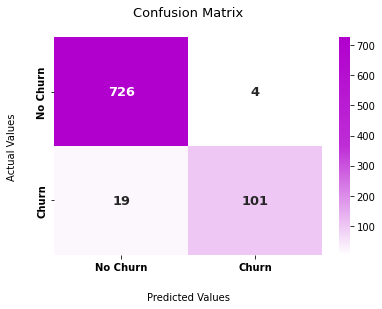

In [ ]:
norm=plt.Normalize(0,700)
cmap = colors.LinearSegmentedColormap.from_list("", ["white","#be2ed6","#b100cd"])

ax = sns.heatmap(cm, annot=True, cmap=cmap, fmt="g", annot_kws={"fontsize":13, "fontweight":"bold"})

ax.set_title('Confusion Matrix\n', fontsize=13);
ax.set_xlabel('Predicted Values', labelpad=20)
ax.set_ylabel('Actual Values', labelpad=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Churn','Churn'], fontweight="bold")
ax.yaxis.set_ticklabels(['No Churn','Churn'], fontweight="bold")

## Display the visualization of the Confusion Matrix.
plt.show()

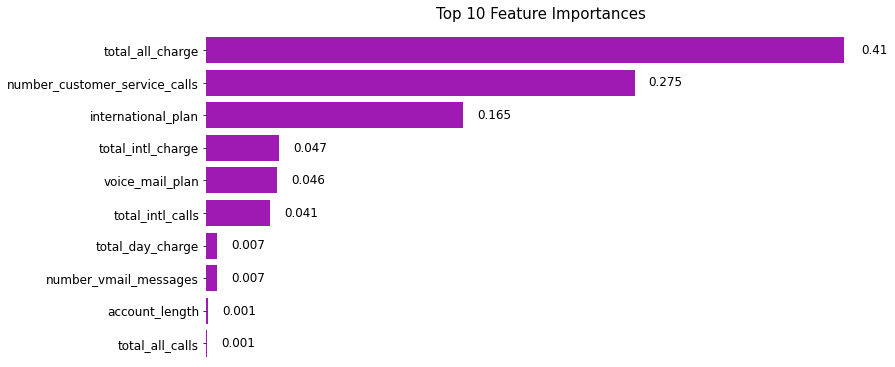

In [ ]:
feature_importances = pd.Series(tree.feature_importances_
                               , name='imp'
                               , index=X_train.columns).sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(y=feature_importances.index, x=feature_importances.values, ax=ax, color="#b100cd")
ax.set_title("Top 10 Feature Importances", pad=15, fontsize=15)
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width+0.02, i+0.1, round(width,3),fontsize=12, ha="center")
ax.yaxis.set_ticklabels(feature_importances.index, fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(False)
plt.show()

Dari variabel yang digunakan dalam pembuatan model machine learning, variabel total_all_charge sangat menentukan apakah seseorang termasuk churn atau tidak. Selanjutnya diikuti dengan variabel number_customer_service_calls dan international_plan.

## Step 5: Membuat Prediksi 📈

Selanjutnya kita akan memprediksi pelanggan yang churn dari data test menggunakan machine learning yang telah dibuat pada tahapan sebelumnya. Perlu dilakukan pemrosesan pada data test terlebih dahulu sebelum diprediksi dengan alur sebagai berikut.

In [ ]:
#cek kembali data test
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
df_test.shape

(750, 20)

In [ ]:
#pisahkan id dengan variabel lainnya
id = df_test.copy()["id"]
test = df_test.copy().drop("id", axis=1)

#feature encoding
test['total_all_calls'] = test['total_day_calls'] + test['total_eve_calls'] + test['total_night_calls'] + test['total_intl_calls']
test['total_all_charge'] = test['total_day_charge'] + test['total_eve_charge'] + test['total_night_charge'] + test['total_intl_charge']

#drop columns
test_drop = drop_cols(test)

#categorical encoding
test_encode = cat_encode(test_drop)

#scaling data numerikal
test_final = scaler(test_encode)

In [ ]:
#pastikan urutan kolomnya sama
test_final = test_final[X_final.columns]

In [ ]:
#prediksi
prediction = tree.predict(test_final)

df_prediction = pd.DataFrame({"id":id.to_list(),"churn":prediction}).set_index("id")
df_prediction.head()

,churn
id,
1,0
2,0
3,0
4,0
5,0


In [ ]:
df_prediction.value_counts()

churn
0        650
1        100
dtype: int64

In [ ]:
#simpan hasil prediksi
df_prediction.to_csv("prediksi_churn.csv", index=False)

## Referensi:
1. Verma, Y., 2022. Why Data Scaling is important in Machine Learning & How to effectively do it. [online] Analytics India Magazine. Available at: <https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/>

  [Accessed 17 October 2022].
2. Gifari, J., Amanda, T., Maulana, A., Fakhruddin, S., Diwanti, D. and Rachman, A., 2021. Data Science & Machine Learning. Depok: Inspira.
2. scikit-learn.org
3. seaborn.pydata.org
4. matplotlib.org
5. pandas.pydata.org
6. analyseup.com